# Personal Project no. 1 - telecom customer churn

## Notebook 1 - Data cleaning and EDA

In this project, I will create predictive models to estimate whether a customer for a telecom company will turn over or churn. The data comes from an old Kaggle competition: https://www.kaggle.com/blastchar/telco-customer-churn/data#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Data import and cleaning

From Kaggle:  

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
#import data and show the head
df = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
#look for null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#examine the data for anomalies
for i in df.columns:
    print(df[i].value_counts())

5176-LDKUH    1
6685-XSHHU    1
8327-WKMIE    1
4737-HOBAX    1
9734-UYXQI    1
3301-VKTGC    1
3162-ZJZFU    1
5043-TRZWM    1
1091-SOZGA    1
2672-DZUOY    1
0484-FFVBJ    1
9840-DVNDC    1
2692-AQCPF    1
1428-GTBJJ    1
4254-QPEDE    1
0958-YHXGP    1
9350-VLHMB    1
6313-GIDIT    1
8207-DMRVL    1
7113-HIPFI    1
2235-ZGKPT    1
4402-FTBXC    1
2694-CIUMO    1
7508-DQAKK    1
5419-KLXBN    1
7905-TVXTA    1
8775-ERLNB    1
8035-PWSEV    1
8690-ZVLCL    1
4644-OBGFZ    1
             ..
2371-JUNGC    1
4295-YURET    1
5296-PSYVW    1
3058-HJCUY    1
1741-WTPON    1
1852-XEMDW    1
3363-EWLGO    1
2038-LLMLM    1
6390-DSAZX    1
6734-CKRSM    1
4360-PNRQB    1
0318-QUUOB    1
4487-ZYJZK    1
9342-VNIMQ    1
1150-FTQGN    1
8080-POTJR    1
3223-DWFIO    1
3719-TDVQB    1
6723-WSNTY    1
4716-MRVEN    1
7398-LXGYX    1
0260-ZDLGK    1
5091-HFAZW    1
2625-TRCZQ    1
6457-USBER    1
7315-WYOAW    1
7892-POOKP    1
9136-ALYBR    1
6285-FTQBF    1
6583-KQJLK    1
Name: customerID, Length

In [6]:
print(len(df))
df = df[df['TotalCharges'] != ' ']
print(len(df))

7043
7032


In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace([1, 0], ['SeniorC', 'Not SeniorC'])
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [8]:
df._get_numeric_data().columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

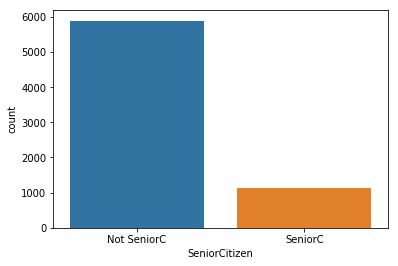

In [9]:
sns.countplot(x='SeniorCitizen', data=df)

In [10]:
for i in df.columns:
    if df[i].dtype == 'float64':
        df[i] = df[i].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null int64
TotalCharges        7032 non-null int64
Churn               7032 non-null object
dtypes: int64(3), object(18)
memory

In [12]:
data_corr = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
data_corr.dtypes

gender              object
SeniorCitizen       object
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges       int64
TotalCharges         int64
Churn               object
dtype: object

In [13]:
data_corr.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
from dython.model_utils import roc_graph
from dython.nominal import associations

def associations_example():
    associations(data_corr,nominal_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                                            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])

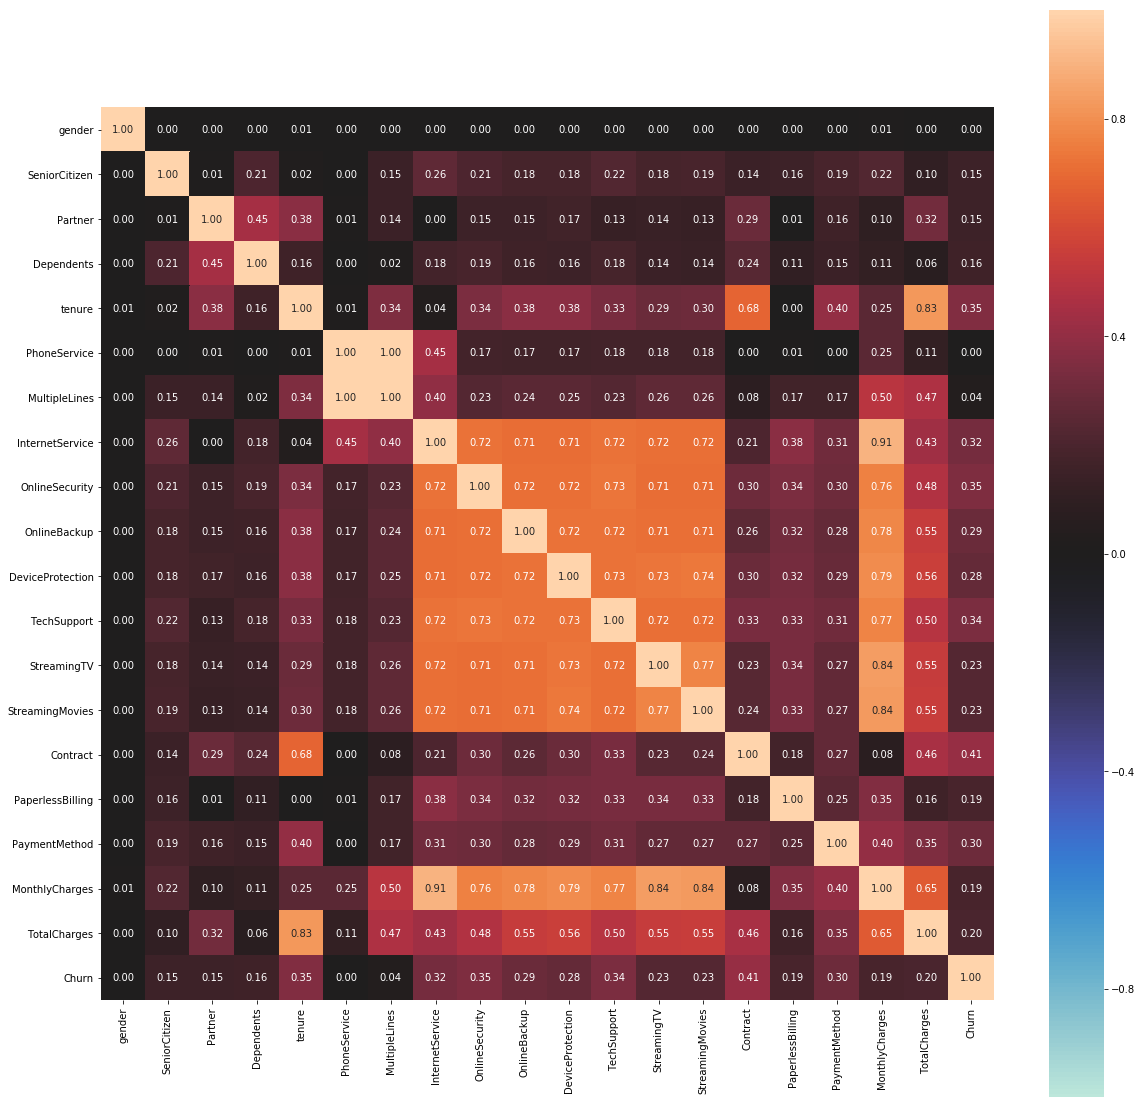

In [17]:
plt.rcParams["figure.figsize"]=20,20
associations_example()

In [ ]:
data.hist(figsize=(20,15));

For most of the above graphs with just two columns - 0 represents no, 1 represents yes.

Quick takeaways:
- Churn is about 26% of the sample
- Contract is about a 8:3:3 for month to month:1 year: 2 year
- 5:2 split on whether customer has dependents
- There are 1,520 cases of customers without Internet service - they show as 2 for [DeviceProtection, OnlineBackup, OnlineSecurity, StreamingTV, StreamingMovies, TechSupport] and as 0 for InternetService
- Even split of males/females, partner/no partner, paperless billing/paper bills, whether or not customers stream tv and movies, DSL vs Fiber internet options, multiple lines option.
- Most customers are not Senior Citizens
- A little less than 10% don't have phone service
- Approx 2:3 ratio (40%) of customers who subscribe to premium services if they have Internet service
- The tenure shows a relatively steady customer onboarding with a certain percent sticking around for periods longer than a year - shown by the plateaued tenure from months 20 - 65. Seems like many leave after a year, but those who stay do so for a long time. Avg tenure is ~2.75 years.
- Monthly Charges shows a spike in the low range - there are about 1500 in that range, which would suggest those are the customers without Internet packages) - and then a relatively normal distribution of the remaining charges, suggesting different packages and service options.

Initial thoughts/speculations/guesses:
- Most senior citizens have phone but not internet service.
- Additional services are mostly held by customers without dependents and with a partner (DINKs - dual income no kids) so disposable income.

In [ ]:
data.describe()

### Feature importance and scaling

In [ ]:
#examine if there is a relationship between tenure and Monthly Charges
fig = plt.figure(figsize=(10,6))
ax = plt.scatter(data['tenure'], data['MonthlyCharges'])
plt.xlabel('Tenure in months')
plt.ylabel('Total Charges in dollars')

There is a clear split between groups who pay a minimum amount and remain with the company and then those who begin to pay for more expensive services and remain for a long time. It would be interesting to see who is in the group who pays the minimum and stays vs those who pay the most and stay. Middle package customers either don't stay, or those are new options.

I want to make the columns categorical and determine if there is any multicollinearity at play

In [ ]:
#THIS is a good plot, I should make it for each initial variable against churn, two side by side plots

#Here I plotted age against race to see if there is any indication of who the
#patients are. It appears the majority of patients under 40 are not Asian or 
#Hispanic. This could speak to something about how Hispanic and Asian 
#patients experience diabetes.
fig, ax = plt.subplots(figsize = (8,5))
sns.despine(bottom=True, left=True)

sns.stripplot(x='SeniorCitizen', y='TotalCharges', data=data, dodge=True, jitter=True)
plt.show()

In [ ]:
df.columns

In [ ]:
#plotting independent variable correlation matrix
correlation = abs(round(df.corr(), 2))
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(correlation, annot = True, square=True)
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

Using a threshold of 0.75 for multicollinearity, I will have to drop a few variables. I will drop Total Charges instead of tenure. I will drop Multiple Lines 2, which signifies no multiple lines. 

In [ ]:
df.columns

In [ ]:
#drop multiplelines 2 and TotalCharges
dd = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
         'PhoneService', 'MultipleLines', 'OnlineSecurity', 
         'OnlineBackup', 'StreamingTV',  'Contract', 'PaperlessBilling', 
         'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [ ]:
correlation = abs(round(dd.corr(), 2))
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(correlation, annot = True, square=True)
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

In [ ]:
dd.describe()

In [ ]:
dd.head()

In [ ]:
y = dd.Churn
X = dd.drop('Churn', axis=1)

In [ ]:
X = X.reset_index()
features = [i for i in X.columns]

In [ ]:
kp = KPrototypes(n_clusters=4, init='Huang', n_init=15, verbose=1)
kpclusters = kp.fit_predict(dd, categorical=[1,2])

In [ ]:
#Here I am using a Standard Scaler to scale the continuous varaibles in the data.
#This will normalize some of the features that have a wider range (age) for those
#with a lower range (drugchange)
a = X[X.columns[:3]]
a = StandardScaler().fit_transform(a)
b = pd.DataFrame(data=a, columns=features[:3])
X = X.drop(features[:3], axis=1)
X = X.merge(b, left_index=True, right_index=True)
X = X.drop('index', axis=1)

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(y_train.value_counts())

print(y_test.value_counts())

In [ ]:
#Generate a copy of the training and testing set for each model
lrX_train = X_train
lrX_test = X_test
lry_train = y_train
lry_test = y_test

In [ ]:
#The first model will be Logistic Regression

#Instantiate a LogReg classifier and fit the training sets

#fit_intercept is set to False because we don't want a constant added to the 
#decision function. C is large to boost regularization and penalize misclasses.
#solver is 'sag' or Stochastic Average Gradient decent solver
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='sag')
model_log = logreg.fit(lrX_train, lry_train)
print(model_log)

#setting the predicted train and test sets
lry_hat_train = logreg.predict(lrX_train)
lry_hat_test = logreg.predict(lrX_test)

#because the target is currently set to 'Readmit' and 'No_readmit' I need
#to code them as 0 and 1.
lry_train = np.array([1 if i == 1 else 0 for i in lry_train])
lry_hat_train = np.array([1 if i == 1 else 0 for i in lry_hat_train])


#Calculate the residuals for the training set
residuals = np.abs(lry_train - lry_hat_train)
print('------------------------------------\tTraining Accuracy')
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))


lry_test = np.array([1 if i == 1 else 0 for i in lry_test])
lry_hat_test = np.array([1 if i == 1 else 0 for i in lry_hat_test])

#Calculate the residuals for the testing set
residuals = np.abs(lry_test - lry_hat_test)
print('------------------------------------\tTesting Accuracy')
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

In [ ]:
dtX_train = X_train
dtX_test = X_test
dty_train = y_train
dty_test = y_test

#Same as the LR model, I need to recode the target classes
dty_train = np.array([1 if i == 1 else 0 for i in dty_train])
dty_test = np.array([1 if i == 1 else 0 for i in dty_test])

In [ ]:
#Starting with a baseline classifier (parameter optimization will come later)
#and only setting the random state of the model.
dtclassifier = DecisionTreeClassifier(random_state=123)
dtclassifier.fit(dtX_train, dty_train)
print(dtclassifier.fit(dtX_train, dty_train))

#This is the accuracy score of the baseline training model
training_accuracy = dtclassifier.score(dtX_train, dty_train)

#This is the accuracy score of the baseline test model
test_accuracy = dtclassifier.score(dtX_test, dty_test)

print("")
print('Baseline Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Baseline Test Accuracy: {:.4}%'.format(test_accuracy * 100))
print("")

#This is a list of the amount of variance each feature seems to explain in the model
print(dtclassifier.feature_importances_)


#print a confusion matrix
dty_hat_test = dtclassifier.predict(dtX_test)
class_names = set(y)
cnf_mat_dt = confusion_matrix(dty_test, dty_hat_test)

In [ ]:
#This function allows a plpt of the feature importance of a given classifier
#and the training data set. Feature importance allows us insight as to which 
#features provide the most information/explain the most variance in the data.

def plot_feature_importances(model, train):
    n_features = train.shape[1]
    plt.figure(figsize=(15,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dtclassifier, dtX_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfX_train = X_train
rfX_test = X_test
rfy_train = y_train
rfy_test = y_test

#Same as the LR model, I need to recode the target classes
rfy_train = np.array([1 if i == 1 else 0 for i in rfy_train])
rfy_test = np.array([1 if i == 1 else 0 for i in rfy_test])

#Generate a baseline RandomForest Classifier. Default estimator is always a 
#Decision Tree classifier. The number of estimators defaults to 100. The 
#samples are being drawn with replacement because bootstrap defaults to True.
rfclassifier = RandomForestClassifier(random_state=123, n_jobs=-1)
print(rfclassifier.fit(rfX_train, rfy_train))

#This is the accuracy score of the baseline training model
training_accuracy = rfclassifier.score(rfX_train, rfy_train)

#This is the accuracy score of the baseline testing model
test_accuracy = rfclassifier.score(rfX_test, rfy_test)

print("")
print('Baseline Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Baseline Test Accuracy: {:.4}%'.format(test_accuracy * 100))
print("")

plot_feature_importances(rfclassifier, rfX_train)

#plot a confusion matrix for the full forest
rfy_hat_test = rfclassifier.predict(rfX_test)
class_names = set(y)
cnf_mat_rf = confusion_matrix(rfy_test, rfy_hat_test)

From the modeling, it is clear that the training data is well fit, but the model is overfit which is causing a significant drop off in accuracy for the testing data. This is indicative of high variance.